In [1]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import mplfinance as mpf
from binance.enums import *

apikey='MZoUNKZin6hLFAaPtMyi0GrZXjz8ca55OL4Qlmys3YuUOSzS6fdtW97WvlKzs5yA'
secret='QuIoCo9pTkb8hw1ktIXZoxtPKnG9e2kXYCLy05c876aHqA4NL1T4s5ZAWtD2q9y4'

client=Client(apikey,secret)

In [2]:
tickers=client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.07213300'},
 {'symbol': 'LTCBTC', 'price': '0.00274900'},
 {'symbol': 'BNBBTC', 'price': '0.00940500'},
 {'symbol': 'NEOBTC', 'price': '0.00061100'},
 {'symbol': 'QTUMETH', 'price': '0.00261800'},
 {'symbol': 'EOSETH', 'price': '0.00087200'},
 {'symbol': 'SNTETH', 'price': '0.00002439'},
 {'symbol': 'BNTETH', 'price': '0.00082000'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00012200'},
 {'symbol': 'BNBETH', 'price': '0.13040000'},
 {'symbol': 'BTCUSDT', 'price': '47010.04000000'},
 {'symbol': 'ETHUSDT', 'price': '3390.68000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001158'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [3]:
tickers[0]['symbol']

'ETHBTC'

In [4]:
tickers_df=pd.DataFrame(tickers)

In [5]:
tickers_df.head()


,symbol,price
0,ETHBTC,0.07213300
1,LTCBTC,0.00274900
2,BNBBTC,0.00940500
3,NEOBTC,0.00061100
4,QTUMETH,0.00261800


In [6]:
tickers_df.tail()

,symbol,price
1985,APEBNB,0.03150000
1986,GMTBRL,8.75100000
1987,GMTETH,0.00053960
1988,JASMYTRY,0.54880000
1989,SANTOSBUSD,6.38900000


In [7]:
tickers_df.set_index('symbol',inplace=True)

In [8]:
tickers_df.loc['BTCUSDT']

price    47010.04000000
Name: BTCUSDT, dtype: object

In [9]:
float(tickers_df.loc['ETHBTC']['price'])

0.072133

In [10]:
depth=client.get_order_book(symbol='ETHBTC')

In [11]:
depth

{'lastUpdateId': 5093250400,
 'bids': [['0.07213300', '22.46370000'],
  ['0.07213200', '0.10000000'],
  ['0.07213000', '3.84300000'],
  ['0.07212800', '0.10000000'],
  ['0.07212700', '1.91380000'],
  ['0.07212600', '0.18120000'],
  ['0.07212400', '0.10000000'],
  ['0.07212200', '0.10000000'],
  ['0.07212100', '0.00170000'],
  ['0.07212000', '0.24750000'],
  ['0.07211900', '0.47240000'],
  ['0.07211800', '0.10000000'],
  ['0.07211600', '2.49190000'],
  ['0.07211500', '2.76210000'],
  ['0.07211400', '15.45090000'],
  ['0.07211300', '5.68240000'],
  ['0.07211200', '0.10000000'],
  ['0.07211100', '5.10650000'],
  ['0.07211000', '13.08570000'],
  ['0.07210800', '0.13340000'],
  ['0.07210700', '1.19780000'],
  ['0.07210600', '3.68780000'],
  ['0.07210500', '0.54830000'],
  ['0.07210400', '0.10400000'],
  ['0.07210300', '0.90290000'],
  ['0.07210200', '0.25020000'],
  ['0.07210000', '1.49670000'],
  ['0.07209900', '5.46810000'],
  ['0.07209800', '3.99670000'],
  ['0.07209700', '0.03500000'],


In [12]:
depth_df=pd.DataFrame(depth['bids'])
depth_df.columns=['Price','volume']
depth_df.head()

,Price,volume
0,0.07213300,22.46370000
1,0.07213200,0.10000000
2,0.07213000,3.84300000
3,0.07212800,0.10000000
4,0.07212700,1.91380000


In [13]:
depth_df.dtypes

Price     object
volume    object
dtype: object

In [14]:
historical= client.get_historical_klines('ETHBTC',Client.KLINE_INTERVAL_1DAY,'1 Jan 2011')
"""
[
    [
        open time
        Open
        High
        Low
        Close
        Volume
        close time
        quote Asset volume
        mumber of trades
        taker buy base asset volume
        taker buy quote asset volume
        Ignore
    ]
]
"""

'\n[\n    [\n        open time\n        Open\n        High\n        Low\n        Close\n        Volume\n        close time\n        quote Asset volume\n        mumber of trades\n        taker buy base asset volume\n        taker buy quote asset volume\n        Ignore\n    ]\n]\n'

In [15]:
historical

[[1499990400000,
  '0.08000000',
  '0.09103300',
  '0.08000000',
  '0.09099300',
  '1942.05700000',
  1500076799999,
  '170.23852396',
  1994,
  '1076.40500000',
  '94.82527222',
  '22262.26697743'],
 [1500076800000,
  '0.09099300',
  '0.09369900',
  '0.08712700',
  '0.08763500',
  '4013.06600000',
  1500163199999,
  '363.03178785',
  4623,
  '2250.31800000',
  '203.54149755',
  '22275.36801826'],
 [1500163200000,
  '0.08750800',
  '0.08763500',
  '0.07559100',
  '0.08224100',
  '8904.15800000',
  1500249599999,
  '722.21248196',
  8137,
  '5557.57500000',
  '450.34388688',
  '22295.47295841'],
 [1500249600000,
  '0.08236800',
  '0.08839400',
  '0.08169900',
  '0.08753700',
  '6650.93300000',
  1500335999999,
  '568.24653804',
  7639,
  '3859.48500000',
  '329.66875309',
  '22165.74281157'],
 [1500336000000,
  '0.08783100',
  '0.10906800',
  '0.08477700',
  '0.10773200',
  '7245.74100000',
  1500422399999,
  '674.49785037',
  8121,
  '4202.05500000',
  '393.11140275',
  '22505.62469176

In [16]:
client.get_historical_klines        

<bound method Client.get_historical_klines of <binance.client.Client object at 0x0000021D43A86CA0>>

In [17]:
hist_df=pd.DataFrame(historical)

In [18]:
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,22262.26697743
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,22275.36801826
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,22295.47295841
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,22165.74281157
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,22505.62469176


In [19]:
hist_df.columns = ['Open Time','Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 'Number of Trades', 'TB Base Volume','TB Quote Volume','Ignore']

In [20]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1499990400000,0.08000000,0.09103300,0.08000000,0.09099300,1942.05700000,1500076799999,170.23852396,1994,1076.40500000,94.82527222,22262.26697743
1,1500076800000,0.09099300,0.09369900,0.08712700,0.08763500,4013.06600000,1500163199999,363.03178785,4623,2250.31800000,203.54149755,22275.36801826
2,1500163200000,0.08750800,0.08763500,0.07559100,0.08224100,8904.15800000,1500249599999,722.21248196,8137,5557.57500000,450.34388688,22295.47295841
3,1500249600000,0.08236800,0.08839400,0.08169900,0.08753700,6650.93300000,1500335999999,568.24653804,7639,3859.48500000,329.66875309,22165.74281157
4,1500336000000,0.08783100,0.10906800,0.08477700,0.10773200,7245.74100000,1500422399999,674.49785037,8121,4202.05500000,393.11140275,22505.62469176


In [21]:
hist_df.shape

(1722, 12)

In [22]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [23]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit = 's')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit = 's')


In [24]:
numeric_columns=['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']

In [25]:
hist_df[numeric_columns]=hist_df[numeric_columns].apply(pd.to_numeric,axis=1)

In [26]:
hist_df.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [27]:
hist_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,1722.000000,1722.000000,1722.000000,1722.000000,1.722000e+03,1722.000000,1.722000e+03,1722.000000,1722.000000
mean,0.046020,0.047152,0.044842,0.046015,1.950500e+05,7763.378323,1.931692e+05,97832.956522,3888.374945
std,0.022439,0.023071,0.021780,0.022432,1.418979e+05,5824.857737,1.317046e+05,70905.748345,2865.692827
min,0.016415,0.016560,0.016150,0.016415,1.942057e+03,170.238524,1.994000e+03,1076.405000,94.825272
25%,0.027557,0.028325,0.026838,0.027559,1.032054e+05,4091.522612,1.131182e+05,51424.402000,2007.337787
50%,0.035084,0.035915,0.034283,0.035081,1.593161e+05,6484.019154,1.596620e+05,80068.794000,3313.026342
75%,0.068580,0.070109,0.066891,0.068627,2.506410e+05,9579.532508,2.317125e+05,127250.754500,4856.188210
max,0.113075,0.123799,0.109343,0.113185,1.396957e+06,56836.342035,1.201493e+06,701279.783000,28345.303271


In [28]:
hist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           1722 non-null   datetime64[ns]
 1   Open                1722 non-null   float64       
 2   High                1722 non-null   float64       
 3   Low                 1722 non-null   float64       
 4   Close               1722 non-null   float64       
 5   Volume              1722 non-null   float64       
 6   Close Time          1722 non-null   datetime64[ns]
 7   Quote Asset Volume  1722 non-null   float64       
 8   Number of Trades    1722 non-null   int64         
 9   TB Base Volume      1722 non-null   float64       
 10  TB Quote Volume     1722 non-null   float64       
 11  Ignore              1722 non-null   object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 161.6+ KB


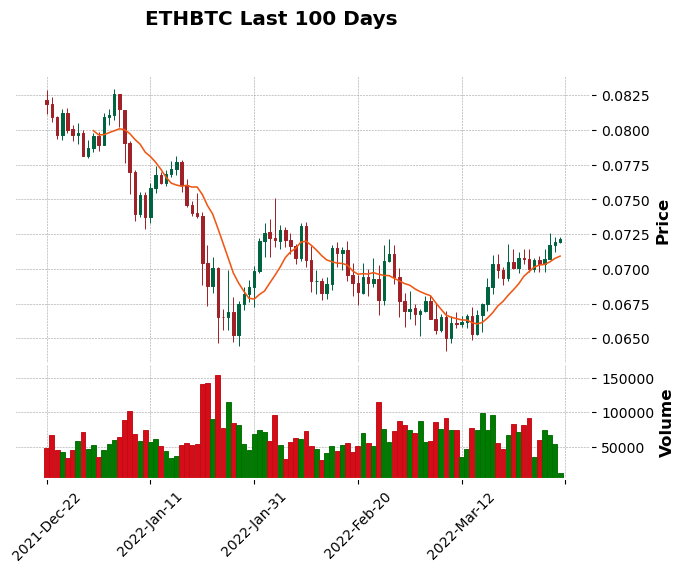

In [29]:
mpf.plot(hist_df.set_index('Close Time').tail(100), type='candle', style= 'charles',volume=True, title='ETHBTC Last 100 Days',mav=10)

In [30]:
#balance = client.get_asset_balance(asset='BTC')
#balance

In [31]:
info = client.get_account()
info

{'makerCommission': 10,
 'takerCommission': 10,
 'buyerCommission': 0,
 'sellerCommission': 0,
 'canTrade': True,
 'canWithdraw': True,
 'canDeposit': True,
 'updateTime': 1648199826296,
 'accountType': 'SPOT',
 'balances': [{'asset': 'BTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'LTC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'ETH', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'NEO', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNB', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'QTUM', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'EOS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'SNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BNT', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'GAS', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'BCC', 'free': '0.00000000', 'locked': '0.00000000'},
  {'asset': 'USDT', 'free': '131.41658473', 'locke

In [32]:
#orders = client.get_all_orders(symbol='BNBBTC', limit=10)
#orders

In [33]:
#price=client.get_symbol_ticker(symbol="ACMUSDT")
#price

In [34]:
#order = client.order_market_buy(
#    symbol='ACMUSDT',
#    quantity=10)

In [35]:
#orders = client.get_all_orders(symbol='ACMUSDT', limit=10)
#orders

In [36]:
#order = client.get_order(
#    symbol='ACMUSDT',
#    orderId='82277691')
#order

In [37]:
#order = client.order_market_sell(
#    symbol='ACMUSDT',
#    quantity=9)

In [38]:
#order = client.order_market_buy(
#    symbol='ACMUSDT',
#    quantity=10)

In [39]:
#balance = client.get_asset_balance(asset='ACMUSDT')
#balance

In [40]:
#client.get_account_api_trading_status()